In [5]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('../../Data/Processed/Climate_data.csv')

IRS_data = pd.read_csv("/Users/sofiasegal/Desktop/MLProject/ShapTime/Data/Processed/time_features (2).csv").drop(columns=["Unnamed: 0"], axis=1)

In [7]:
IRS_data

,date,meantemp,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,34.500000,27.500000,5.562500,998.625000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1571,2017-04-21,34.250000,39.375000,6.962500,999.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1572,2017-04-22,32.900000,40.900000,8.890000,1001.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573,2017-04-23,32.875000,27.500000,9.962500,1002.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.head()

IRS_data.head()

,date,meantemp,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data

,date,meantemp,humidity,wind_speed,meanpressure,Year,Month,Day,Weekday
0,2013-01-01,0.122271,0.840372,0.000000,0.132603,0.0,0.000000,0.000000,0.166667
1,2013-01-02,0.042795,0.929054,0.070583,0.132881,0.0,0.000000,0.033333,0.333333
2,2013-01-03,0.035662,0.869932,0.109743,0.132994,0.0,0.000000,0.066667,0.500000
3,2013-01-04,0.081514,0.684685,0.029212,0.132799,0.0,0.000000,0.100000,0.666667
4,2013-01-05,0.000000,0.867962,0.087636,0.132712,0.0,0.000000,0.133333,0.833333
...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,0.871179,0.166385,0.131750,0.130385,1.0,0.272727,0.633333,0.500000
1571,2017-04-21,0.863537,0.306799,0.164910,0.130548,1.0,0.272727,0.666667,0.666667
1572,2017-04-22,0.822271,0.324831,0.210564,0.130772,1.0,0.272727,0.700000,0.833333
1573,2017-04-23,0.821507,0.166385,0.235966,0.130841,1.0,0.272727,0.733333,1.000000


In [10]:
train = data[:-180]
test = data[-180:]
print(train.shape)
print(test.shape)

IRS_train = IRS_data[:-180]
IRS_test = IRS_data[-180:]

print(IRS_train.shape)
print(IRS_test.shape)

IRS_train.tail()

(1395, 9)
(180, 9)
(1395, 13)
(180, 13)


,date,meantemp,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
1390,2016-10-22,29.333333,49.481481,13.323077,1009.370370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1391,2016-10-23,27.500000,54.961538,11.546154,1009.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1392,2016-10-24,28.500000,51.423077,11.188462,1008.269231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1393,2016-10-25,28.040000,54.560000,12.388462,1008.923077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1394,2016-10-26,27.576923,56.192308,5.700000,1011.730769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
x_train = train.drop(columns={"date", "meantemp"}, axis=1)
y_train = train.loc[:, ["meantemp"]]


IRS_x_train = IRS_train.drop(columns={"date", "meantemp"}, axis=1)
IRS_y_train = IRS_train.loc[:, ["meantemp"]]

x_test = test.drop(columns={"date", "meantemp"}, axis=1)
y_test = test.loc[:, ["meantemp"]]

IRS_x_test = IRS_test.drop(columns={"date", "meantemp"}, axis=1)
IRS_y_test = IRS_test.loc[:, ["meantemp"]]

In [12]:
IRS_x_test

,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
1395,59.370370,6.044444,1014.629630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,58.777778,7.277778,1012.407407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,62.777778,1.714815,1013.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,71.043478,2.013043,1014.608696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1399,66.807692,1.642308,1017.807692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1570,27.500000,5.562500,998.625000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1571,39.375000,6.962500,999.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1572,40.900000,8.890000,1001.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573,27.500000,9.962500,1002.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


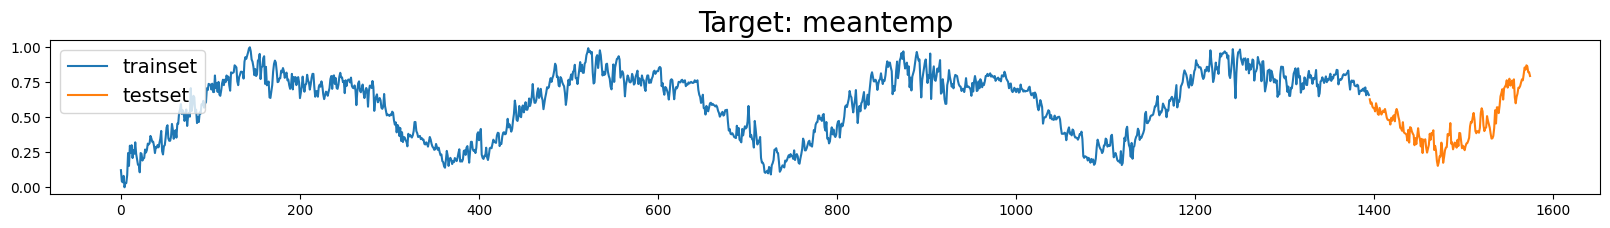

In [13]:
sns.reset_orig()
plt.figure(figsize=(20, 2))
plt.title("Target: meantemp", fontsize=20)
plt.plot(y_train["meantemp"], label="trainset")
plt.plot(y_test["meantemp"], label="testset")

plt.legend(fontsize=14)
plt.show()

# LightGBM

In [14]:
import xgboost

In [15]:
model = xgboost.XGBRegressor().fit(x_train, y_train)

pred = model.predict(x_test)
r2 = r2_score(pred, y_test)
mse = mean_squared_error(pred, y_test)

print("R2: ", r2, "  ;  ", "MSE: ", mse)

IRS_model = xgboost.XGBRegressor().fit(IRS_x_train, IRS_y_train)
IRS_pred = IRS_model.predict(IRS_x_test)
IRS_r2 = r2_score(IRS_pred, IRS_y_test)
IRS_mse = mean_squared_error(IRS_pred, IRS_y_test)
print("R2: ", IRS_r2, "  ;  ", "MSE: ", IRS_mse)

R2:  0.7800800800323486   ;   MSE:  0.007802941836416721
R2:  0.6894561648368835   ;   MSE:  13.548141479492188


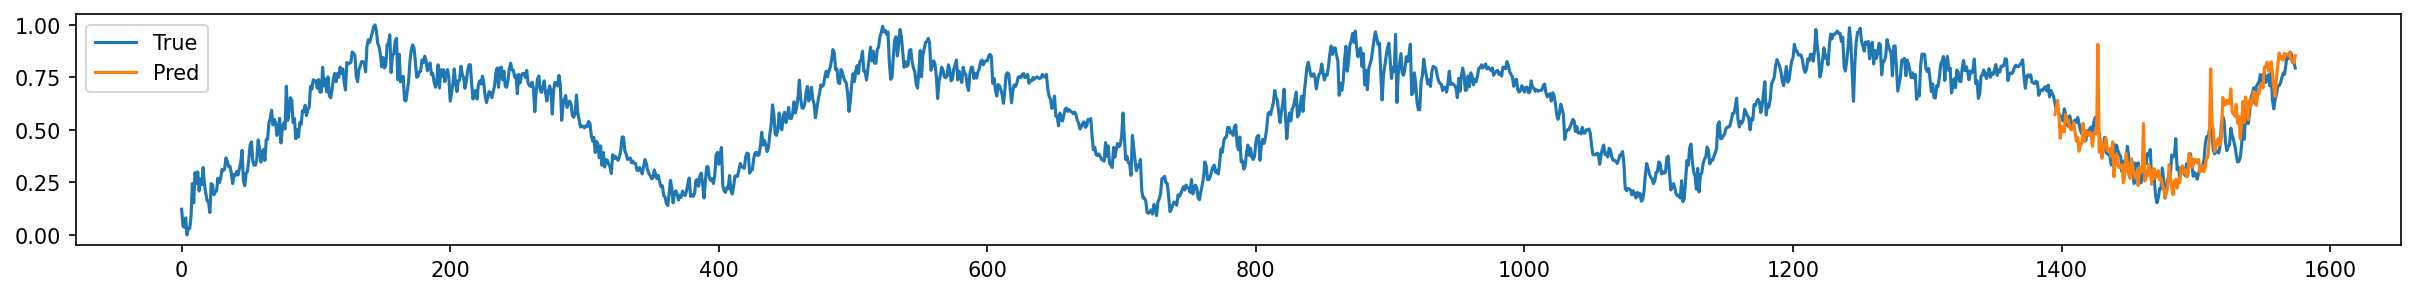

In [16]:
prediction = pd.DataFrame(pred, index=y_test.index)

sns.reset_orig()
plt.figure(figsize=(20, 2), dpi=150)

plt.plot(data["meantemp"], label="True")
plt.plot(prediction, label="Pred")

plt.legend()

plt.show()

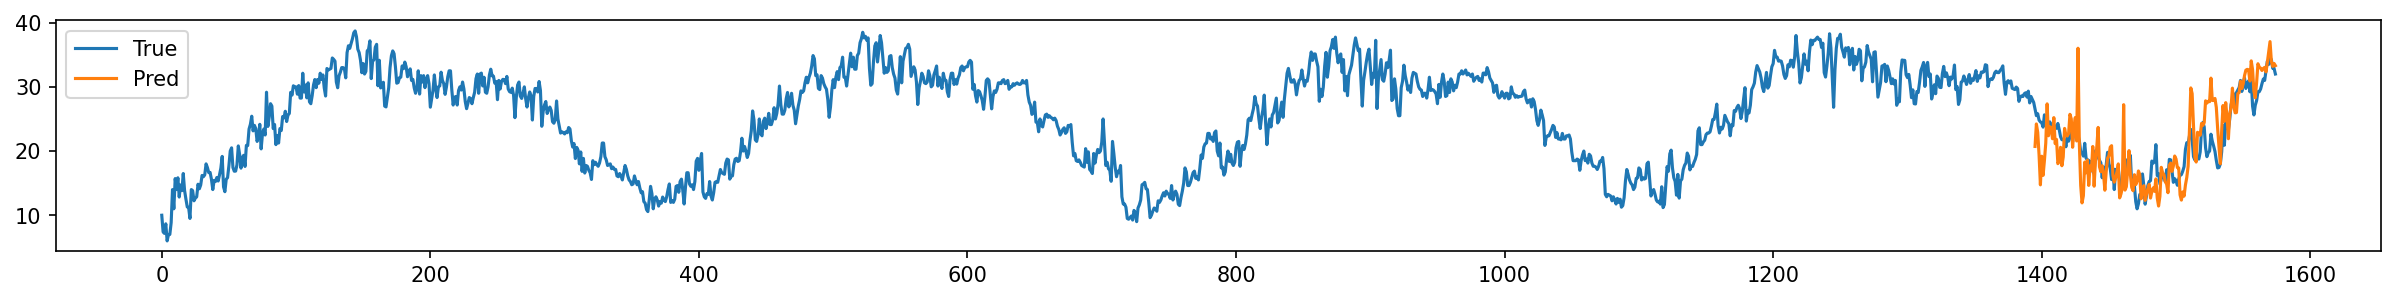

In [17]:
IRS_prediction = pd.DataFrame(IRS_pred, index=IRS_y_test.index)

sns.reset_orig()
plt.figure(figsize=(20, 2), dpi=150)

plt.plot(IRS_data["meantemp"], label="True")
plt.plot(IRS_prediction, label="Pred")

plt.legend()

plt.show()

# Interpretation of LightGBM

In [18]:
import ShapTimeBoosting
from ShapTimeBoosting import supertime, ShapleyValues, TimeImportance, TimeHeatmap

In [19]:
# The training set is evenly divided into 8 parts in the time dimension,
# and the importance of each part is calculated.
Tn = 8

interp_x = x_train
IRS_interp_x = IRS_x_train
model = model

IRS_model = IRS_model

# a list of 8 Shapley values per SHAPTime definition
# one for each time chunk out of 8
ShapTime_lgb = ShapleyValues(model, interp_x, Tn)

In [20]:
x_train

,humidity,wind_speed,meanpressure,Year,Month,Day,Weekday
0,0.840372,0.000000,0.132603,0.00,0.000000,0.000000,0.166667
1,0.929054,0.070583,0.132881,0.00,0.000000,0.033333,0.333333
2,0.869932,0.109743,0.132994,0.00,0.000000,0.066667,0.500000
3,0.684685,0.029212,0.132799,0.00,0.000000,0.100000,0.666667
4,0.867962,0.087636,0.132712,0.00,0.000000,0.133333,0.833333
...,...,...,...,...,...,...,...
1390,0.426301,0.315563,0.131784,0.75,0.818182,0.700000,0.833333
1391,0.491099,0.273476,0.131776,0.75,0.818182,0.733333,1.000000
1392,0.449259,0.265004,0.131640,0.75,0.818182,0.766667,0.000000
1393,0.486351,0.293426,0.131726,0.75,0.818182,0.800000,0.166667


In [21]:
ShapTime_lgb

[np.float32(-0.012612179),
 np.float32(0.004181029),
 np.float32(-0.040710445),
 np.float32(0.033793874),
 np.float32(-0.05462159),
 np.float32(0.046076372),
 np.float32(-0.04684656),
 np.float32(0.07189466)]

In [22]:
# name these time periods
time_columns = ["t0", "t1", "t2", "t3", "t4", "t5", "t6", "t7"]

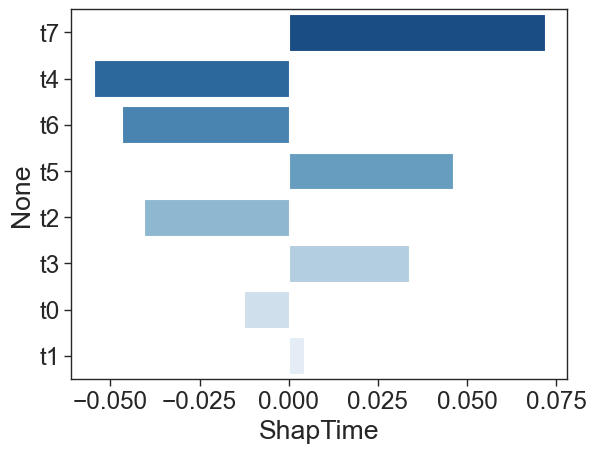

In [23]:
# Time importance is just the author-defined
# code that provides this plot
TimeImportance(Tn, ShapTime_lgb, time_columns)

In [24]:
# PHASE Two

import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def TimeIntervalSHAP(model, x_data, interval_features):
    """
    Compute SHAP values for binary time-interval indicator features (T_1,...,T_8).

    Parameters
    ----------
    model : trained LightGBM model
    x_data : pd.DataFrame with ALL model input features including T_1...T_8
    interval_features : list of columns corresponding to interval indicators

    Returns
    -------
    shap_interval_df : DataFrame with SHAP value for each interval (signed)
    """

    # 1️⃣ Compute SHAP values for ALL features (LightGBM requires full feature set)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_data)

    # Convert to DataFrame
    shap_df = pd.DataFrame(shap_values, columns=x_data.columns)

    # 2️⃣ Keep only the interval feature SHAP values
    shap_interval = shap_df[interval_features]

    # 3️⃣ Average the SHAP value for each interval across all rows
    interval_means = shap_interval.mean(axis=0)

    # Build output DataFrame
    shap_interval_df = pd.DataFrame(
        {"ShapleyValue": interval_means, "absolute": interval_means.abs()}
    )

    # Sort by absolute value like SHAPTime
    shap_interval_df.sort_values(by="absolute", ascending=False, inplace=True)

    # 4️⃣ Plot (same style as SHAPTime)
    sns.set(context="paper", style="ticks", font_scale=2)
    ax = sns.barplot(
        x="ShapleyValue",
        y=shap_interval_df.index,
        data=shap_interval_df,
        orient="h",
        color="lightskyblue",
        palette="Blues_r",
    )
    ax.set_xlabel("Shapley Value (Interval Feature Importance)")
    ax.set_ylabel("Time Interval")
    plt.show()

    return shap_interval_df

In [25]:
IRS_x_train

,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
0,84.500000,0.000000,1015.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,92.000000,2.980000,1017.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87.000000,4.633333,1018.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71.333333,1.233333,1017.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,86.833333,3.700000,1016.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1390,49.481481,13.323077,1009.370370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1391,54.961538,11.546154,1009.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1392,51.423077,11.188462,1008.269231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1393,54.560000,12.388462,1008.923077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


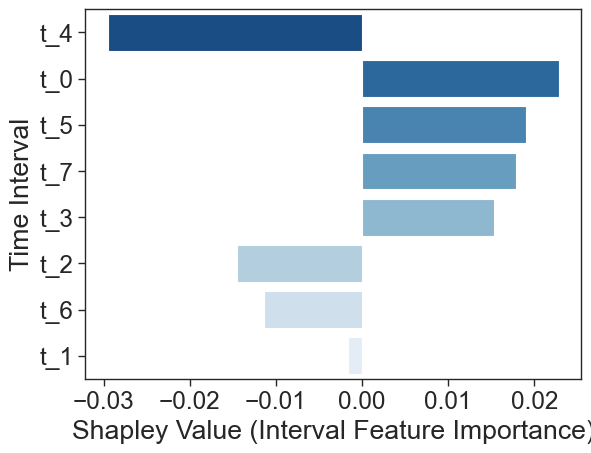

In [26]:
interval_features = ["t_0", "t_1", "t_2", "t_3", "t_4", "t_5", "t_6", "t_7"]

shap_interval_vals = TimeIntervalSHAP(
    IRS_model, IRS_x_train, interval_features  # dataset used to train the model
)

# negative value => as this goes up, prediction meantemp goes down

In [27]:
# IGNORE

In [28]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import shap

# # OUR TIME ENCODED DATA
# def TimeImportanceEncoded(model, x_data, time_features, time_columns, Tn=8, time_column=None):
#     """
#     Compute and plot temporal importance using standard SHAP values
#     for only time-related features, aggregated over Tn intervals,
#     keeping the sign (positive/negative) to mirror SHAPTime plot.

#     Parameters
#     ----------
#     model : trained LightGBM model
#     x_data : pd.DataFrame, includes all features used for prediction
#     time_features : list of column names that encode temporal info
#     time_columns : list of names for the time intervals (length Tn)
#     Tn : int, number of time intervals to split
#     time_column : str, optional, column representing time for grouping rows
#     """

#     x_data = x_data.copy()

#     # 1️⃣ Create time intervals
#     n = len(x_data)
#     if time_column is None:
#         x_data['time_group'] = pd.qcut(range(n), q=Tn, labels=False)
#     else:
#         x_data['time_group'] = pd.qcut(x_data[time_column], q=Tn, labels=False)

#     # 2️⃣ Compute SHAP values for all features
#     feature_cols = [c for c in x_data.columns if c != 'time_group']
#     explainer = shap.TreeExplainer(model)
#     shap_values_all = explainer.shap_values(x_data[feature_cols])

#     # Convert to DataFrame
#     shap_df_all = pd.DataFrame(shap_values_all, columns=feature_cols)

#     # 3️⃣ Keep only time-related features for aggregation
#     shap_df_time = shap_df_all[time_features].copy()
#     shap_df_time['time_group'] = x_data['time_group']

#     # 4️⃣ Aggregate SHAP values per time interval, keeping sign
#     interval_importance = shap_df_time.groupby('time_group').mean().mean(axis=1)

#     # 5️⃣ Prepare DataFrame for plotting
#     plot_df = pd.DataFrame({'ShapTime': interval_importance.values})

#     # Assign user-provided interval names
#     if len(time_columns) != Tn:
#         raise ValueError("Length of time_columns must equal Tn")
#     plot_df.index = time_columns

#     # Sort by ShapTime (optional)
#     plot_df.sort_values(by='ShapTime', inplace=True)

#     # 6️⃣ Plot (horizontal barplot, signed)
#     sns.set(context='paper', style='ticks', font_scale=2)
#     ax = sns.barplot(
#         x="ShapTime",
#         y=plot_df.index,
#         data=plot_df,
#         orient='h',
#         color="lightskyblue",
#         palette='Blues_r'
#     )
#     ax.set_xlabel("SHAP Value (Temporal Importance)")
#     ax.set_ylabel("Time Interval")
#     plt.show()

#     return plot_df

In [29]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import shap

# # NOT INTENDED FOR TIME ENCODED DATA

# def TimeImportanceTraditionalSHAP(model, x_data, time_columns, Tn=8, time_column=None):
#     """
#     Compute and plot temporal importance using traditional SHAP
#     for the SAME model used with SHAPTime (no time-encoded features),
#     by aggregating feature-level SHAP values over Tn time intervals.

#     Parameters
#     ----------
#     model : trained LightGBM model (same one used for SHAPTime)
#     x_data : pd.DataFrame, features used to train that model
#     time_columns : list of names for the time intervals (length Tn)
#     Tn : int, number of time intervals to split
#     time_column : str, optional, column representing time for grouping rows
#                   If None, row order is used.
#     """

#     x_data = x_data.copy()

#     # 1️⃣ Create time intervals (same idea as SHAPTime)
#     n = len(x_data)
#     if time_column is None:
#         x_data['time_group'] = pd.qcut(range(n), q=Tn, labels=False)
#     else:
#         x_data['time_group'] = pd.qcut(x_data[time_column], q=Tn, labels=False)

#     # 2️⃣ Compute traditional SHAP values for ALL features
#     #    (must match training features exactly)
#     feature_cols = [c for c in x_data.columns if c != 'time_group']
#     explainer = shap.TreeExplainer(model)
#     shap_values_all = explainer.shap_values(x_data[feature_cols])

#     # Put SHAP values in a DataFrame
#     shap_df_all = pd.DataFrame(shap_values_all, columns=feature_cols)
#     shap_df_all['time_group'] = x_data['time_group']

#     # 3️⃣ Aggregate SHAP per time interval (keep sign)
#     #    → mean over rows in interval, then mean over features
#     interval_importance = (
#         shap_df_all
#         .groupby('time_group')
#         .mean()           # avg SHAP per feature in each interval
#         .mean(axis=1)     # avg across all features
#     )

#     # 4️⃣ Build DataFrame in the same style as original TimeImportance
#     if len(time_columns) != Tn:
#         raise ValueError("Length of time_columns must equal Tn")

#     shapley_impor = pd.DataFrame(index=range(Tn), columns=['ShapTime'])
#     shapley_impor['ShapTime'] = interval_importance.values
#     shapley_impor['absolute'] = shapley_impor['ShapTime'].abs()

#     # Set readable interval labels
#     shapley_impor.index = time_columns

#     # Sort by absolute magnitude (like original SHAPTime plot)
#     shapley_impor.sort_values(by='absolute', inplace=True, ascending=False)

#     # 5️⃣ Plot (same visual style as SHAPTime)
#     sns.set(context='paper', style='ticks', font_scale=2)
#     ax = sns.barplot(
#         x="ShapTime",
#         y=shapley_impor.index,
#         data=shapley_impor,
#         orient='h',
#         color="lightskyblue",
#         palette='Blues_r'
#     )
#     ax.set_xlabel("SHAP Value (Traditional SHAP, aggregated by time interval)")
#     ax.set_ylabel("Time Interval")
#     plt.show()

#     return shapley_impor

In [30]:
# time_columns = ["t0","t1","t2","t3","t4","t5","t6","t7"]

# traditional_shap_time_imp = TimeImportanceTraditionalSHAP(
#     model,
#     x_train,   # the data WITHOUT encoded time features
#     time_columns,
#     Tn=8,
#     time_column=None  # or None if you just use row order
# )

In [31]:
# time_features = ["meantemp_lag_1","meantemp_roll_mean_7d","meantemp_roll_mean_30d"]  # your time features

# plot_df = TimeImportanceEncoded(IRS_model, IRS_x_train, time_features, time_columns, Tn=8, time_column=None)

In [32]:
# time_features = ['lag_1_temp', 'lag_2_temp', 'rolling_7', 'month', 'day_of_year']  # your time features
# time_columns = ["Interval 1","Interval 2","Interval 3","Interval 4",
#                 "Interval 5","Interval 6","Interval 7","Interval 8"]  # names for the 8 intervals

# plot_df = TimeImportanceEncoded(model, x_train, time_features, time_columns, Tn=8, time_column='date')

In [33]:
TimeHeatmap(Tn, ShapTime_lgb, time_columns)

# Evaluation of Interpretation

### Feature-Independence

In [34]:
import EvaluationBoosting
from ShapTimeBoosting import FeaIndepenVal, PlotVal

In [35]:
n = 3
Tn = 8
x_train_val = x_train.copy()
y_train = y_train
initial = ShapTime_lgb
model = xgboost.XGBRegressor()

In [36]:
result = FeaIndepenVal(x_train_val, y_train, initial, model, Tn, n, time_columns)

In [37]:
result

,t0,t1,t2,t3,t4,t5,t6,t7
0,-0.012612,0.004181,-0.040710,0.033794,-0.054622,0.046076,-0.046847,0.071895
1,-0.012810,0.004374,-0.040676,0.033661,-0.054500,0.046031,-0.046885,0.071956
2,-0.012626,0.004119,-0.040595,0.033844,-0.054747,0.046134,-0.046949,0.071969
3,-0.012423,0.004034,-0.040831,0.033904,-0.054557,0.045972,-0.046957,0.072018


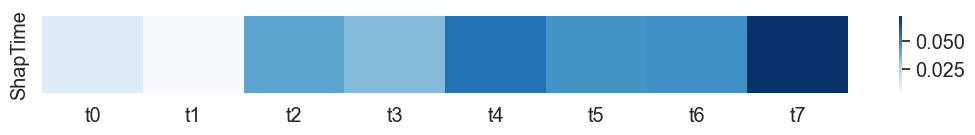

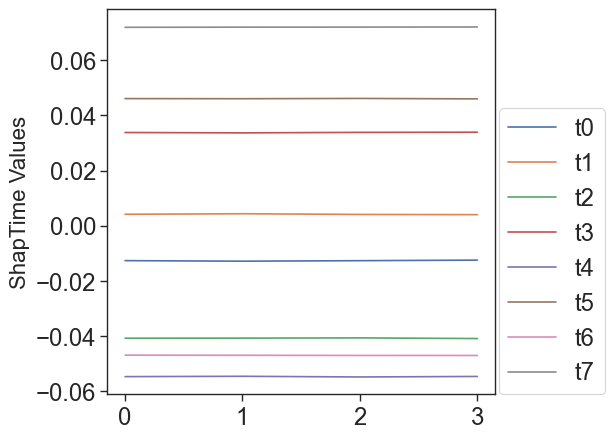

In [38]:
PlotVal(result)

### Sensitivity

In [39]:
situation_0 = [0, 1, 2, 3, 4, 5, 6, 7]
situation_1 = [0, 1, 2, 3, 4, 5, 6, 1]
situation_2 = [0, 1, 2, 3, 0, 5, 6, 1]

In [40]:
total = [situation_0, situation_1, situation_2]
train_eva = train.drop(columns="date")

IRS_train_eva = IRS_train.drop(columns="date")

df_eva = supertime(8, train_eva)

IRS_df_eva = supertime(8, IRS_train_eva)

model_eva = xgboost.XGBRegressor()

IRS_model_eva = xgboost.XGBRegressor()

In [41]:
len(IRS_df_eva)

8

In [42]:
import EvaluationBoosting
from EvaluationBoosting import evaluation, R2Plot, MSEPlot

In [43]:
r2_results, mse_results = evaluation(
    df_eva, x_train, y_train, "meantemp", model_eva, total
)

IRS_r2_results, IRS_mse_results = evaluation(
    IRS_df_eva, IRS_x_train, IRS_y_train, "meantemp", IRS_model_eva, total
)

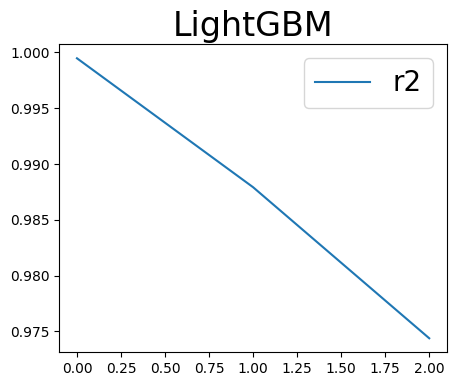

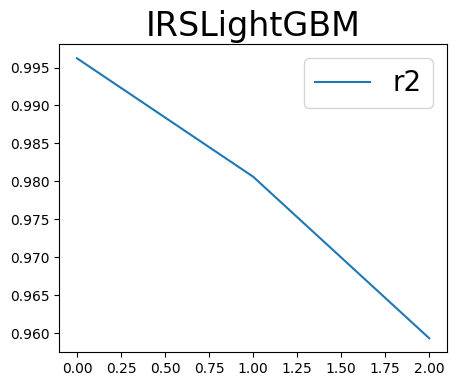

In [44]:
R2Plot(r2_results, "LightGBM")

R2Plot(IRS_r2_results, "IRSLightGBM")

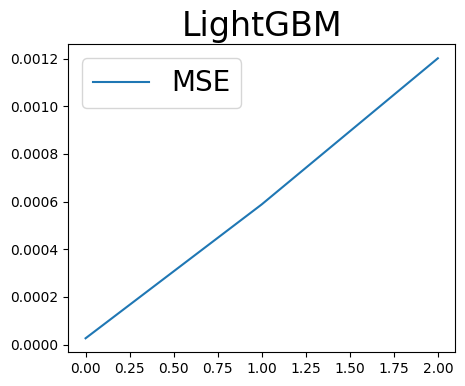

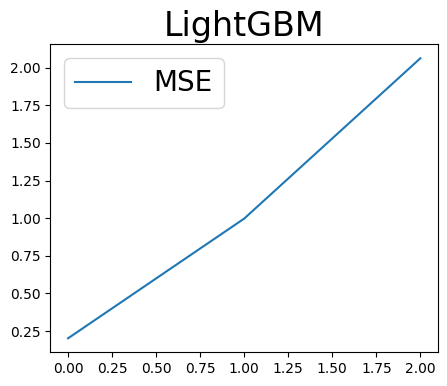

In [45]:
MSEPlot(mse_results, "LightGBM")

MSEPlot(IRS_mse_results, "LightGBM")

# Improvement

In [46]:
for k in range(Tn):
    exec(f"t{k} = supertime(Tn, train)[k]")

In [47]:
check_replist = [t0, t7, t2, t3, t4, t5, t6, t7]
# IRS_check_replist replace t7 with t 4 

In [48]:
check_IRS_data = IRS_train[IRS_train["t_1"] != 1]
t_0 = check_IRS_data[check_IRS_data["t_0"] == 1]
t_7 = check_IRS_data[check_IRS_data["t_7"] == 1]
t_2 = check_IRS_data[check_IRS_data["t_2"] == 1]
t_3 = check_IRS_data[check_IRS_data["t_3"] == 1]
t_4 = check_IRS_data[check_IRS_data["t_4"] == 1]
t_5 = check_IRS_data[check_IRS_data["t_5"] == 1]
t_6 = check_IRS_data[check_IRS_data["t_6"] == 1]    
t_1 = check_IRS_data[check_IRS_data["t_1"] == 1]
check_IRS_data = pd.concat([t_0, t_7, t_2, t_3, t_4, t_5, t_6, t_7])

In [49]:
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'date','meantemp'}, axis = 1)
y_check = check.loc[:, ['meantemp']]

model_check = xgboost.XGBRegressor().fit(x_check, y_check)

pred_check = model_check.predict(x_test)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

0.7626441717147827 Degree of Improvement: -2.24%
0.008013199083507061 Degree of Improvement: -2.69%


In [50]:
# IRS_x_test
s = pd.concat(check_replist, axis=0)

In [51]:
check_IRS_data

,date,meantemp,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2016-10-22,29.333333,49.481481,13.323077,1009.370370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1391,2016-10-23,27.500000,54.961538,11.546154,1009.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1392,2016-10-24,28.500000,51.423077,11.188462,1008.269231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1393,2016-10-25,28.040000,54.560000,12.388462,1008.923077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
s

,date,meantemp,humidity,wind_speed,meanpressure,Year,Month,Day,Weekday
3,2013-01-04,0.081514,0.684685,0.029212,0.132799,0.00,0.000000,0.100000,0.666667
4,2013-01-05,0.000000,0.867962,0.087636,0.132712,0.00,0.000000,0.133333,0.833333
5,2013-01-06,0.030568,0.820270,0.035054,0.132907,0.00,0.000000,0.166667,1.000000
6,2013-01-07,0.030568,0.770608,0.149218,0.133167,0.00,0.000000,0.200000,0.000000
7,2013-01-08,0.087336,0.594595,0.169182,0.133000,0.00,0.000000,0.233333,0.166667
...,...,...,...,...,...,...,...,...,...
1390,2016-10-22,0.713246,0.426301,0.315563,0.131784,0.75,0.818182,0.700000,0.833333
1391,2016-10-23,0.657205,0.491099,0.273476,0.131776,0.75,0.818182,0.733333,1.000000
1392,2016-10-24,0.687773,0.449259,0.265004,0.131640,0.75,0.818182,0.766667,0.000000
1393,2016-10-25,0.673712,0.486351,0.293426,0.131726,0.75,0.818182,0.800000,0.166667


In [53]:
IRS_x_train

,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
0,84.500000,0.000000,1015.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,92.000000,2.980000,1017.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87.000000,4.633333,1018.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71.333333,1.233333,1017.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,86.833333,3.700000,1016.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1390,49.481481,13.323077,1009.370370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1391,54.961538,11.546154,1009.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1392,51.423077,11.188462,1008.269231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1393,54.560000,12.388462,1008.923077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
["t_" + str(i) for i in range(0, 8)]

['t_0', 't_1', 't_2', 't_3', 't_4', 't_5', 't_6', 't_7']

In [55]:
t_0

,date,meantemp,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2013-06-20,33.000000,52.714286,4.771429,997.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,2013-06-21,34.833333,47.333333,5.866667,995.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,2013-06-22,35.600000,39.400000,10.740000,996.200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,2013-06-23,35.166667,53.000000,8.350000,995.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
IRS_x_train

,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
0,84.500000,0.000000,1015.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,92.000000,2.980000,1017.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87.000000,4.633333,1018.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71.333333,1.233333,1017.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,86.833333,3.700000,1016.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1390,49.481481,13.323077,1009.370370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1391,54.961538,11.546154,1009.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1392,51.423077,11.188462,1008.269231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1393,54.560000,12.388462,1008.923077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
IRS_x_test

,humidity,wind_speed,meanpressure,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
1395,59.370370,6.044444,1014.629630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,58.777778,7.277778,1012.407407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,62.777778,1.714815,1013.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,71.043478,2.013043,1014.608696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1399,66.807692,1.642308,1017.807692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1570,27.500000,5.562500,998.625000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1571,39.375000,6.962500,999.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1572,40.900000,8.890000,1001.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573,27.500000,9.962500,1002.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
x_test

,humidity,wind_speed,meanpressure,Year,Month,Day,Weekday
1395,0.543231,0.143165,0.132468,0.75,0.818182,0.866667,0.500000
1396,0.536224,0.172377,0.132179,0.75,0.818182,0.900000,0.666667
1397,0.583521,0.040616,0.132256,0.75,0.818182,0.933333,0.833333
1398,0.681257,0.047680,0.132466,0.75,0.818182,0.966667,1.000000
1399,0.631172,0.038899,0.132882,0.75,0.818182,1.000000,0.000000
...,...,...,...,...,...,...,...
1570,0.166385,0.131750,0.130385,1.00,0.272727,0.633333,0.500000
1571,0.306799,0.164910,0.130548,1.00,0.272727,0.666667,0.666667
1572,0.324831,0.210564,0.130772,1.00,0.272727,0.700000,0.833333
1573,0.166385,0.235966,0.130841,1.00,0.272727,0.733333,1.000000


In [59]:
# check
check = pd.concat(check_replist, axis=0)
x_check = check.drop(columns={"date", "meantemp"}, axis=1)
y_check = check.loc[:, ["meantemp"]]

IRS_x_check = check_IRS_data.drop(["meantemp", "date"], axis=1)
IRS_y_check = check_IRS_data[["meantemp"]]

model_check = xgboost.XGBRegressor().fit(x_check, y_check)
# ours
IRS_model_check = xgboost.XGBRegressor().fit(IRS_x_check, IRS_y_check)


pred_check = model_check.predict(x_test)
IRS_pred_check = IRS_model_check.predict(IRS_x_test)

r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)
# ours
IRS_r2_check = r2_score(IRS_pred_check, IRS_y_test)
IRS_mse_check = mean_squared_error(IRS_pred_check, IRS_y_test)

print(r2_check, "Degree of Improvement: {:.2%}".format((r2_check - r2) / abs(r2)))
print(mse_check, "Degree of Improvement: {:.2%}".format((mse - mse_check) / mse))

print(
    IRS_r2_check,
    "IRS Degree of Improvement: {:.2%}".format((IRS_r2_check - IRS_r2) / abs(IRS_r2)),
)
print(
    IRS_mse_check,
    "IRS Degree of Improvement: {:.2%}".format((IRS_mse - IRS_mse_check) / IRS_mse),
)

0.7626441717147827 Degree of Improvement: -2.24%
0.008013199083507061 Degree of Improvement: -2.69%
0.7051147222518921 IRS Degree of Improvement: 2.27%
13.19544792175293 IRS Degree of Improvement: 2.60%


In [60]:
# #check
# check = pd.concat(check_replist, axis = 0)
# x_check = check.drop(columns = {'date','meantemp'}, axis = 1)
# y_check = check.loc[:, ['meantemp']]

# IRS_check = check
# IRS_x_check = x_check
# IRS_y_check = y_check

# model_check = lgb.LGBMRegressor().fit(x_check, y_check)
# # ours
# IRS_model_check = lgb.LGBMRegressor().fit(IRS_x_check, IRS_y_check)


# pred_check = model_check.predict(x_test)
# IRS_pred_check = IRS_model_check.predict(IRS_x_test)

# r2_check = r2_score(pred_check, y_test)
# mse_check = mean_squared_error(pred_check, y_test)
# # ours
# IRS_r2_check = r2_score(IRS_pred_check, IRS_y_test)
# IRS_mse_check = mean_squared_error(IRS_pred_check, IRS_y_test)

# print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
# print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

# print(IRS_r2_check, 'IRS Degree of Improvement: {:.2%}'.format((IRS_r2_check-IRS_r2)/abs(IRS_r2)))
# print(IRS_mse_check, 'IRS Degree of Improvement: {:.2%}'.format((IRS_mse-IRS_mse_check)/IRS_mse))

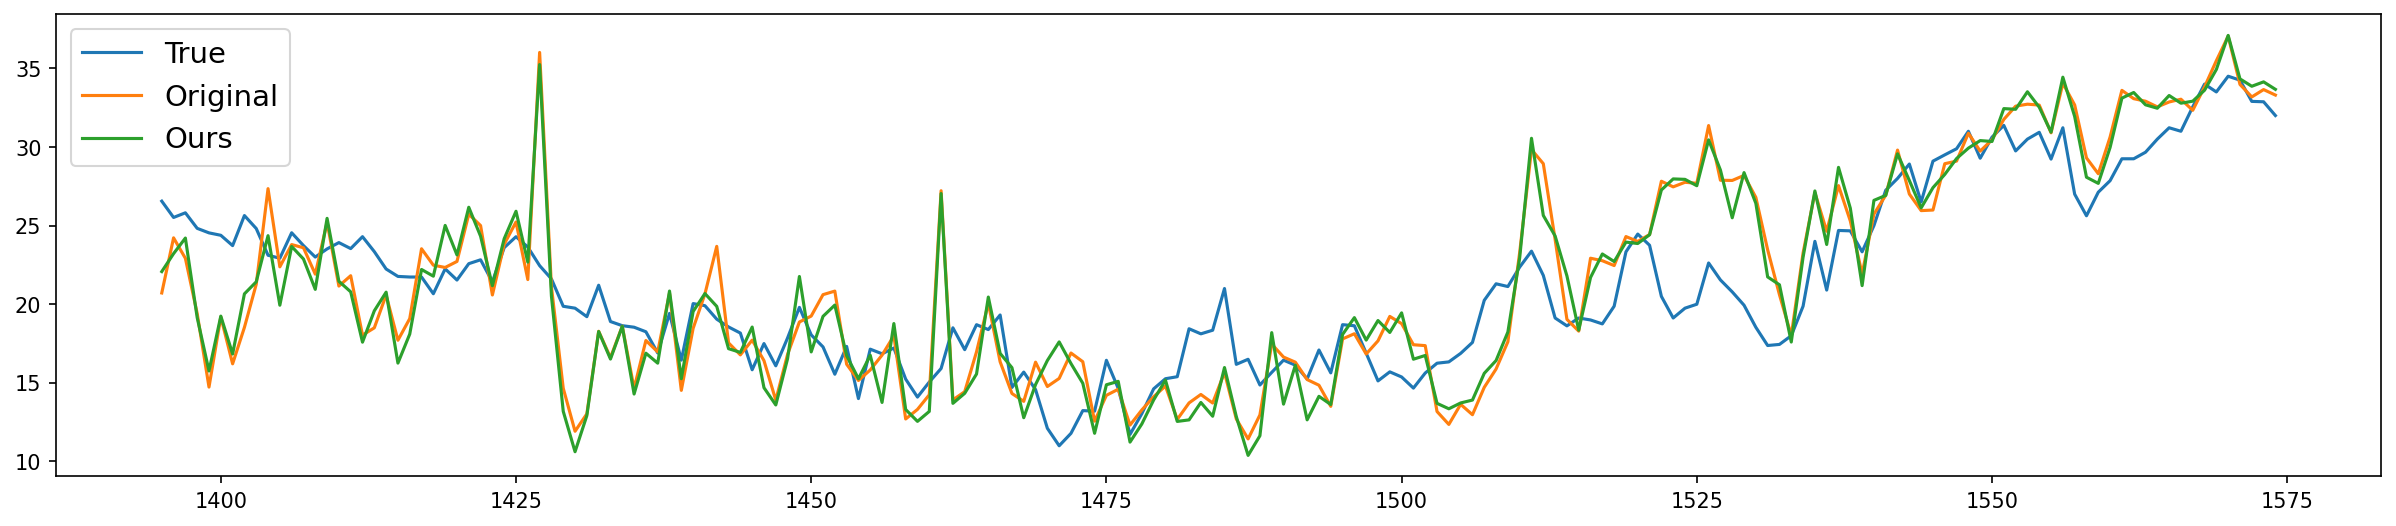

In [61]:
# our plot

IRS_pred_our = pd.DataFrame(IRS_pred_check, index=IRS_y_test.index)

sns.reset_orig()
plt.figure(figsize=(20, 4), dpi=150)

plt.plot(IRS_y_test["meantemp"], label="True")
plt.plot(IRS_prediction, label="Original")
plt.plot(IRS_pred_our, label="Ours")

plt.legend(fontsize=14)
plt.show()

# wee replace orange one just w our data

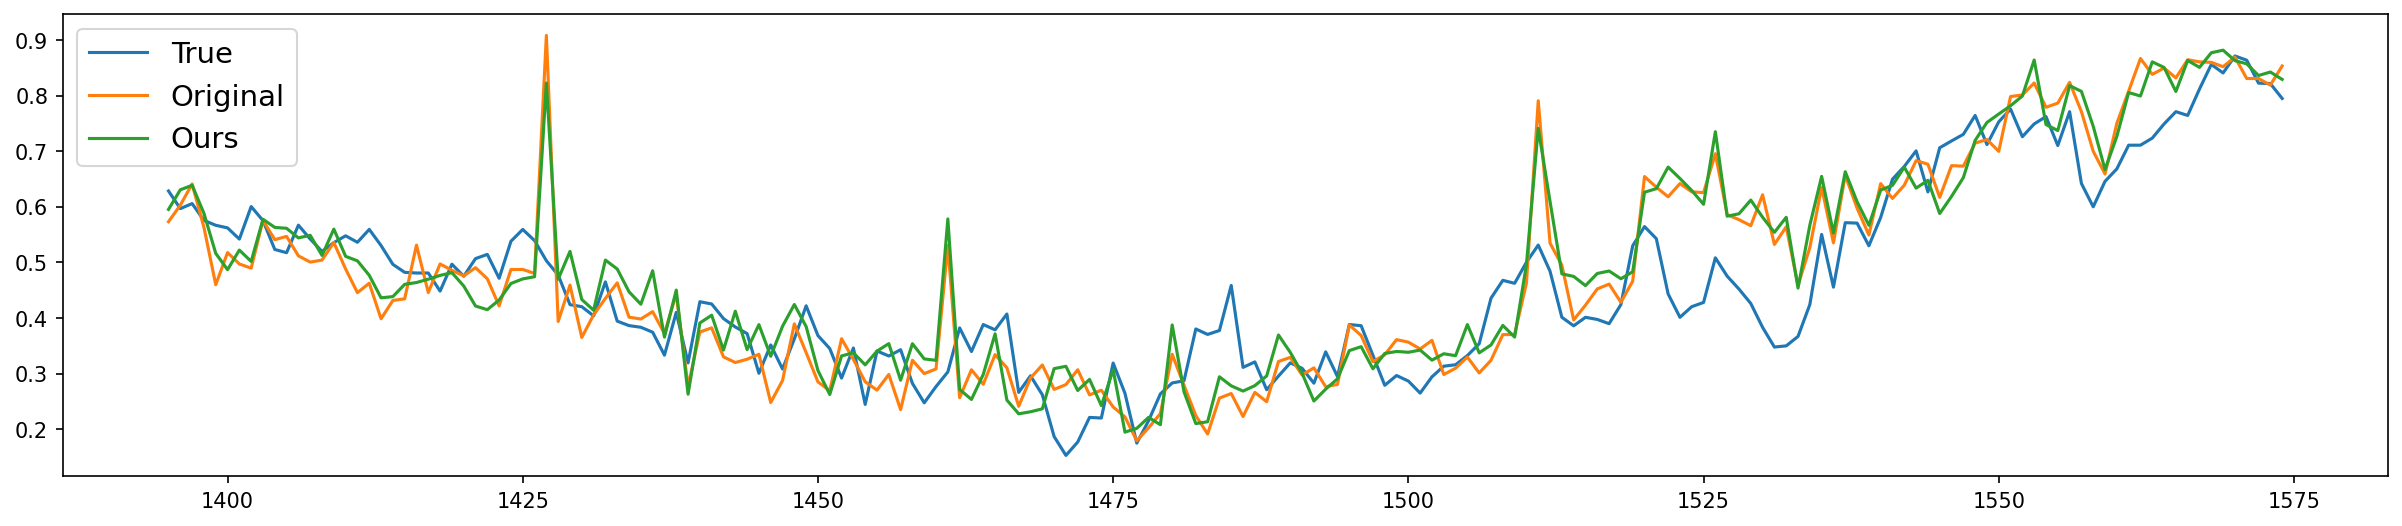

In [62]:
pred_our = pd.DataFrame(pred_check, index=y_test.index)

sns.reset_orig()
plt.figure(figsize=(20, 4), dpi=150)

plt.plot(y_test["meantemp"], label="True")
plt.plot(prediction, label="Original")
plt.plot(pred_our, label="Ours")

plt.legend(fontsize=14)
plt.show()

# wee replace orange one just w our data

# Time-Enhanced Dataset Analysis

Applying the complete ShapTime methodology to the time-enhanced dataset with rich temporal features.

In [63]:
# Load time-enhanced dataset
data_enhanced = pd.read_csv("../../Data/Processed/time_features.csv")
data_enhanced.head()

,Unnamed: 0,date,meantemp,humidity,wind_speed,meanpressure,month,year,sin_dayofyear,cos_dayofyear,...,meantemp_roll_mean_7d,meantemp_roll_mean_30d,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7
0,0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,0.017166,0.999853,...,NaN,NaN,1,0,0,0,0,0,0,0
1,1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013,0.034328,0.999411,...,10.000000,10.000000,1,0,0,0,0,0,0,0
2,2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013,0.051479,0.998674,...,8.700000,8.700000,1,0,0,0,0,0,0,0
3,3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013,0.068615,0.997643,...,8.188889,8.188889,1,0,0,0,0,0,0,0
4,4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013,0.085731,0.996318,...,8.308333,8.308333,1,0,0,0,0,0,0,0


In [64]:
# Data split for time-enhanced dataset
train_enhanced = data_enhanced[:-180]
test_enhanced = data_enhanced[-180:]
print("Enhanced train shape:", train_enhanced.shape)
print("Enhanced test shape:", test_enhanced.shape)

Enhanced train shape: (1395, 21)
Enhanced test shape: (180, 21)


In [65]:
# Prepare features for time-enhanced model (handle NaN values)
# Drop date column and fill any NaN values
train_clean = (
    train_enhanced.drop(columns=["date"]).fillna(method="ffill").fillna(method="bfill")
)
test_clean = (
    test_enhanced.drop(columns=["date"]).fillna(method="ffill").fillna(method="bfill")
)

x_train_enh = train_clean.drop(columns={"meantemp"}, axis=1)
y_train_enh = train_clean.loc[:, ["meantemp"]]

x_test_enh = test_clean.drop(columns={"meantemp"}, axis=1)
y_test_enh = test_clean.loc[:, ["meantemp"]]

print("Enhanced features:", x_train_enh.columns.tolist())

Enhanced features: ['Unnamed: 0', 'humidity', 'wind_speed', 'meanpressure', 'month', 'year', 'sin_dayofyear', 'cos_dayofyear', 'meantemp_lag_1', 'meantemp_roll_mean_7d', 'meantemp_roll_mean_30d', 't_0', 't_1', 't_2', 't_3', 't_4', 't_5', 't_6', 't_7']


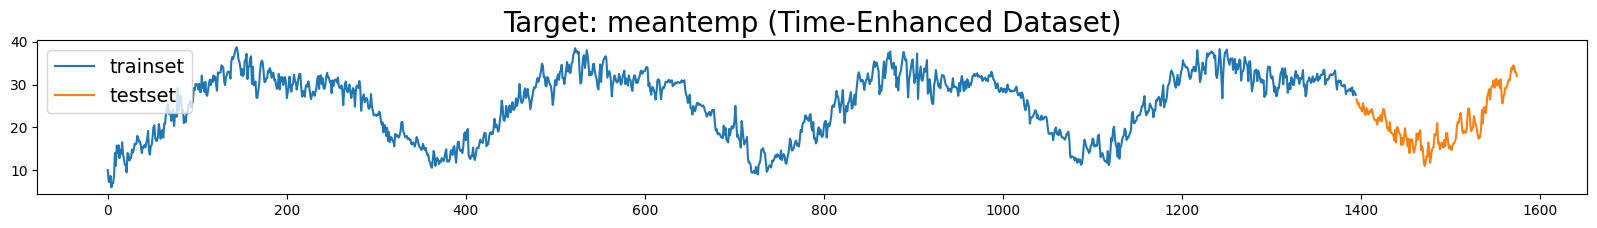

In [66]:
# Visualize enhanced dataset
sns.reset_orig()
plt.figure(figsize=(20, 2))
plt.title("Target: meantemp (Time-Enhanced Dataset)", fontsize=20)
plt.plot(y_train_enh["meantemp"], label="trainset")
plt.plot(y_test_enh["meantemp"], label="testset")

plt.legend(fontsize=14)
plt.show()

# LightGBM on Time-Enhanced Dataset

In [67]:
# Train LightGBM on enhanced features
model_enh = lgb.LGBMRegressor().fit(x_train_enh, y_train_enh)

pred_enh = model_enh.predict(x_test_enh)
r2_enh = r2_score(pred_enh, y_test_enh)
mse_enh = mean_squared_error(pred_enh, y_test_enh)

print("Enhanced Dataset - R2: ", r2_enh, "  ;  ", "MSE: ", mse_enh)

NameError: name 'lgb' is not defined

In [ ]:
# Visualize enhanced model predictions
prediction_enh = pd.DataFrame(pred_enh, index=y_test_enh.index)

sns.reset_orig()
plt.figure(figsize=(20, 2), dpi=150)

plt.plot(data_enhanced["meantemp"], label="True")
plt.plot(prediction_enh, label="Pred (Enhanced)")

plt.legend()
plt.show()

NameError: name 'pred_enh' is not defined

# Interpretation of Enhanced LightGBM

In [ ]:
# ShapTime analysis on enhanced dataset
Tn_enh = 8
interp_x_enh = x_train_enh
model_enh = model_enh

ShapTime_lgb_enh = ShapleyValues(model_enh, interp_x_enh, Tn_enh)

NameError: name 'x_train_enh' is not defined

In [ ]:
ShapTime_lgb_enh

[np.float64(-0.41151755675599094),
 np.float64(0.13530815275347716),
 np.float64(-1.3335645429203784),
 np.float64(1.1150716283047382),
 np.float64(-1.7972241920260026),
 np.float64(1.5227408443379706),
 np.float64(-1.5365014250277267),
 np.float64(2.343392844201583)]

In [ ]:
# Time period names for enhanced dataset
time_columns_enh = [
    "t",
    "t1_enh",
    "t2_enh",
    "t3_enh",
    "t4_enh",
    "t5_enh",
    "t6_enh",
    "t7_enh",
]

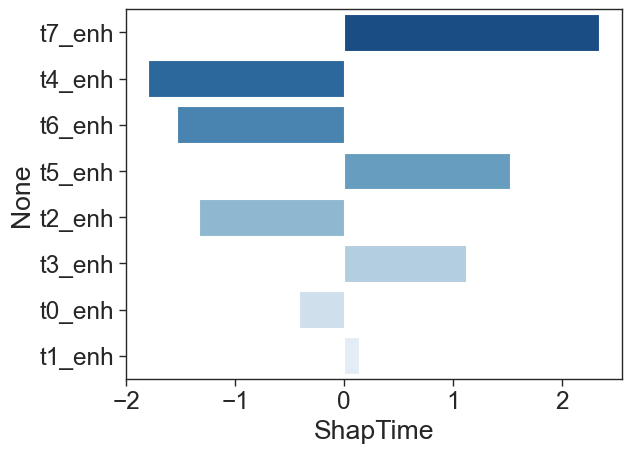

In [ ]:
TimeImportance(Tn_enh, ShapTime_lgb_enh, time_columns_enh)

In [ ]:
TimeHeatmap(Tn_enh, ShapTime_lgb_enh, time_columns_enh)

In [ ]:
for k in range(Tn):
    exec(f"t{k} = supertime(Tn, train)[k]")

In [ ]:
check_replist = [t0, t7, t2, t3, t4, t5, t6, t7]

In [ ]:
# check
check = pd.concat(check_replist, axis=0)
x_check = check.drop(columns={"date", "meantemp"}, axis=1)
y_check = check.loc[:, ["meantemp"]]

model_check = lgb.LGBMRegressor().fit(x_check, y_check)

pred_check = model_check.predict(x_test)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, "Degree of Improvement: {:.2%}".format((r2_check - r2) / abs(r2)))
print(mse_check, "Degree of Improvement: {:.2%}".format((mse - mse_check) / mse))

In [ ]:
pred_our = pd.DataFrame(pred_check, index=y_test.index)

sns.reset_orig()
plt.figure(figsize=(20, 4), dpi=150)

plt.plot(y_test["meantemp"], label="True")
plt.plot(prediction, label="Original")
plt.plot(pred_our, label="Ours")

plt.legend(fontsize=14)
plt.show()

# Evaluation of Enhanced Dataset Interpretation

### Feature-Independence (Enhanced)

In [ ]:
# Feature independence evaluation for enhanced dataset
n_enh = 3
Tn_enh = 8
x_train_val_enh = x_train_enh.copy()
y_train_enh_val = y_train_enh
initial_enh = ShapTime_lgb_enh
model_enh_val = lgb.LGBMRegressor()

In [ ]:
result_enh = FeaIndepenVal(
    x_train_val_enh,
    y_train_enh_val,
    initial_enh,
    model_enh_val,
    Tn_enh,
    n_enh,
    time_columns_enh,
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1778
[LightGBM] [Info] Number of data points in the train set: 1395, number of used features: 9
[LightGBM] [Info] Start training from score 25.735216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1523
[LightGBM] [Info] Number of data points in the train set: 1395, number of used features: 8
[LightGBM] [Info] Start training from score 25.735216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1523
[LightGBM] [Info] Number of data points in the train set: 1395, number of used features: 8
[LightGBM] [Info] Start trainin

In [ ]:
result_enh

,t0_enh,t1_enh,t2_enh,t3_enh,t4_enh,t5_enh,t6_enh,t7_enh
0,-0.411518,0.135308,-1.333565,1.115072,-1.797224,1.522741,-1.536501,2.343393
1,-0.406052,0.142221,-1.328016,1.087974,-1.778994,1.518704,-1.547374,2.348949
2,-0.401758,0.141382,-1.334239,1.090171,-1.780583,1.520285,-1.545574,2.347534
3,-0.416581,0.145524,-1.326418,1.088221,-1.784073,1.523188,-1.542141,2.349257


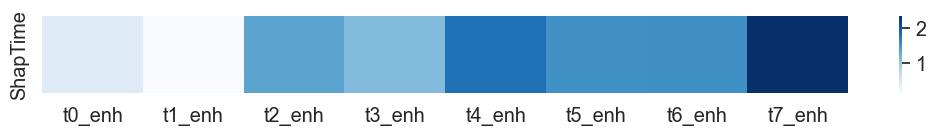

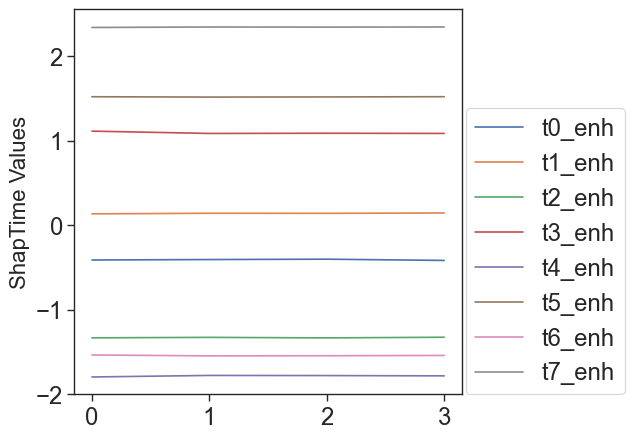

In [ ]:
PlotVal(result_enh)

### Sensitivity (Enhanced)

In [ ]:
# Sensitivity analysis for enhanced dataset
situation_0_enh = [0, 1, 2, 3, 4, 5, 6, 7]
situation_1_enh = [0, 1, 2, 3, 4, 5, 6, 1]
situation_2_enh = [0, 1, 2, 3, 0, 5, 6, 1]

In [ ]:
total_enh = [situation_0_enh, situation_1_enh, situation_2_enh]
train_eva_enh = train_clean
df_eva_enh = supertime(8, train_eva_enh)
model_eva_enh = lgb.LGBMRegressor()

In [ ]:
r2_results_enh, mse_results_enh = evaluation(
    df_eva_enh, x_train_enh, y_train_enh, "meantemp", model_eva_enh, total_enh
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2033
[LightGBM] [Info] Number of data points in the train set: 1392, number of used features: 10
[LightGBM] [Info] Start training from score 25.773032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Number of data points in the train set: 1392, number of used features: 10
[LightGBM] [Info] Start training from score 25.023301
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Number of data points in the train set: 1392, number of used features: 10
[LightGBM] [Info] Start trai

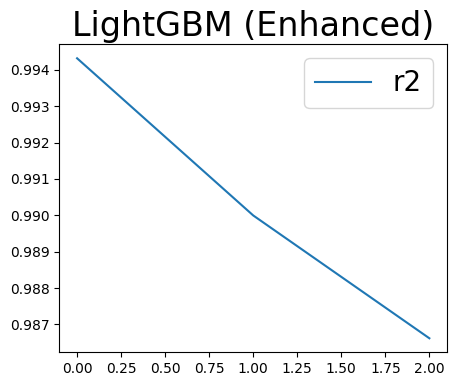

In [ ]:
R2Plot(r2_results_enh, "LightGBM (Enhanced)")

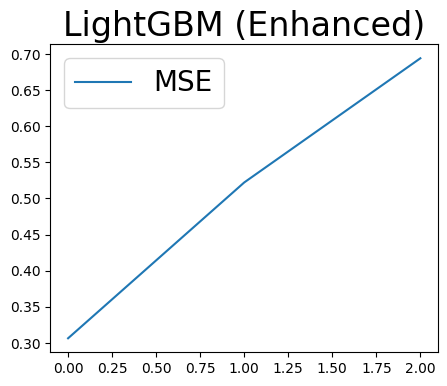

In [ ]:
MSEPlot(mse_results_enh, "LightGBM (Enhanced)")

# Improvement (Enhanced Dataset)

In [ ]:
# Generate time periods for enhanced dataset
for k in range(Tn_enh):
    exec(f"t{k}_enh = supertime(Tn_enh, train_clean)[k]")

In [ ]:
# Create improved model based on ShapTime insights for enhanced dataset
# Use the most important time periods identified by ShapTime
check_replist_enh = [t0_enh, t7_enh, t2_enh, t3_enh, t4_enh, t5_enh, t6_enh, t7_enh]

In [ ]:
# Train improved model on enhanced dataset
check_enh = pd.concat(check_replist_enh, axis=0)
x_check_enh = check_enh.drop(columns={"meantemp"}, axis=1)
y_check_enh = check_enh.loc[:, ["meantemp"]]

model_check_enh = lgb.LGBMRegressor().fit(x_check_enh, y_check_enh)

pred_check_enh = model_check_enh.predict(x_test_enh)
r2_check_enh = r2_score(pred_check_enh, y_test_enh)
mse_check_enh = mean_squared_error(pred_check_enh, y_test_enh)

print("Enhanced Dataset Results:")
print(
    r2_check_enh,
    "Degree of Improvement: {:.2%}".format((r2_check_enh - r2_enh) / abs(r2_enh)),
)
print(
    mse_check_enh,
    "Degree of Improvement: {:.2%}".format((mse_enh - mse_check_enh) / mse_enh),
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2024
[LightGBM] [Info] Number of data points in the train set: 1392, number of used features: 10
[LightGBM] [Info] Start training from score 26.522762
Enhanced Dataset Results:
0.9266222217545278 Degree of Improvement: -0.19%
2.3462752568295064 Degree of Improvement: -2.19%
Enhanced Dataset Results:
0.9266222217545278 Degree of Improvement: -0.19%
2.3462752568295064 Degree of Improvement: -2.19%


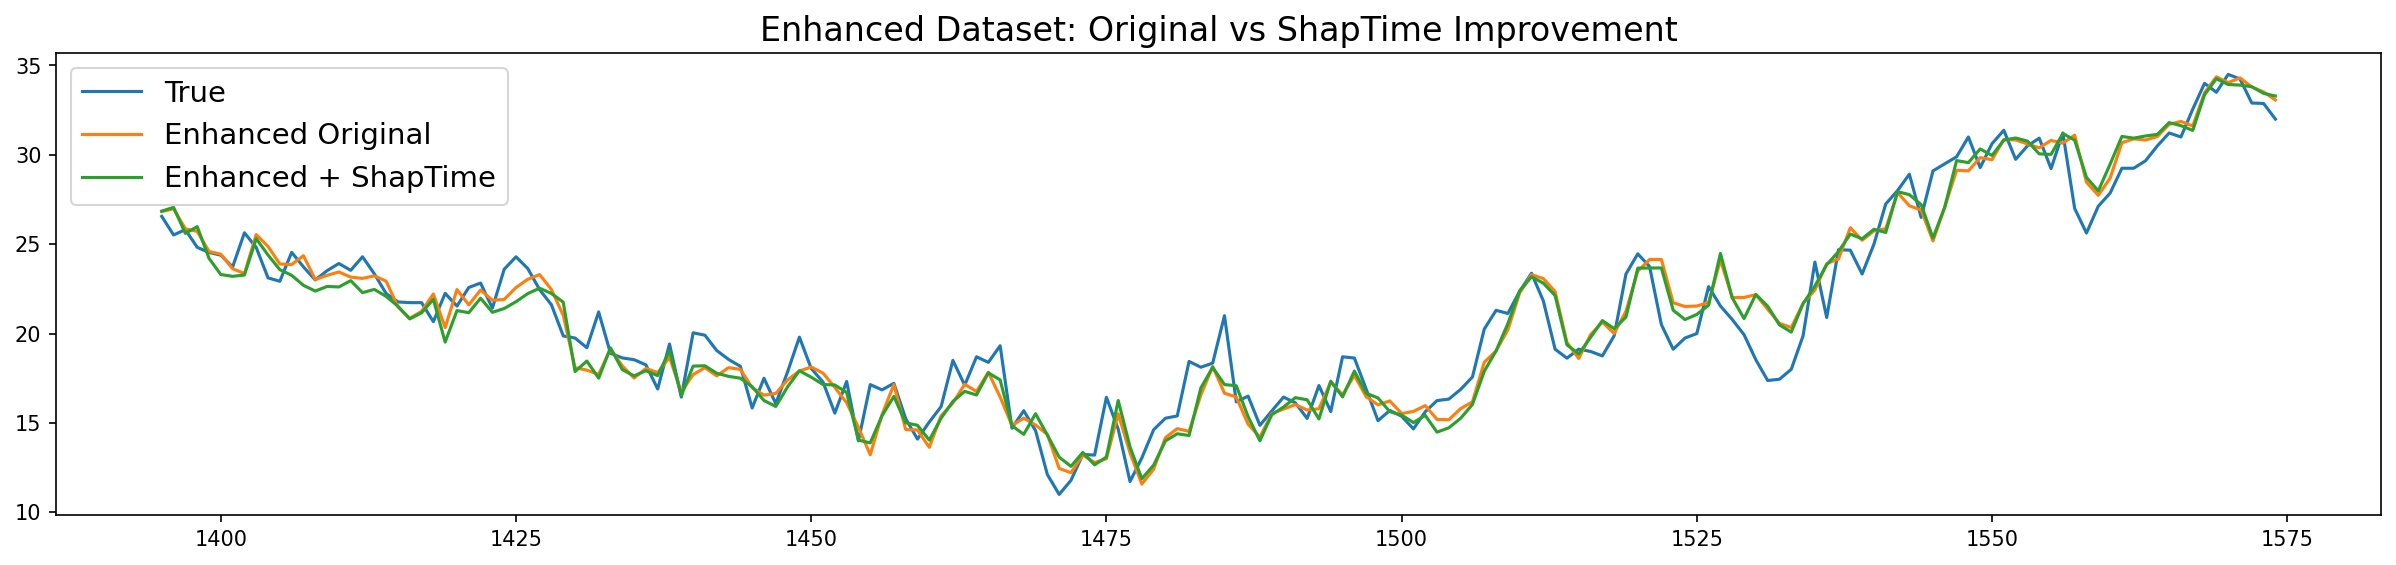

In [ ]:
# Final comparison: Enhanced dataset results
pred_our_enh = pd.DataFrame(pred_check_enh, index=y_test_enh.index)

sns.reset_orig()
plt.figure(figsize=(20, 4), dpi=150)

plt.plot(y_test_enh["meantemp"], label="True")
plt.plot(prediction_enh, label="Enhanced Original")
plt.plot(pred_our_enh, label="Enhanced + ShapTime")

plt.title("Enhanced Dataset: Original vs ShapTime Improvement", fontsize=16)
plt.legend(fontsize=14)
plt.show()

# Final Comparison: All Models

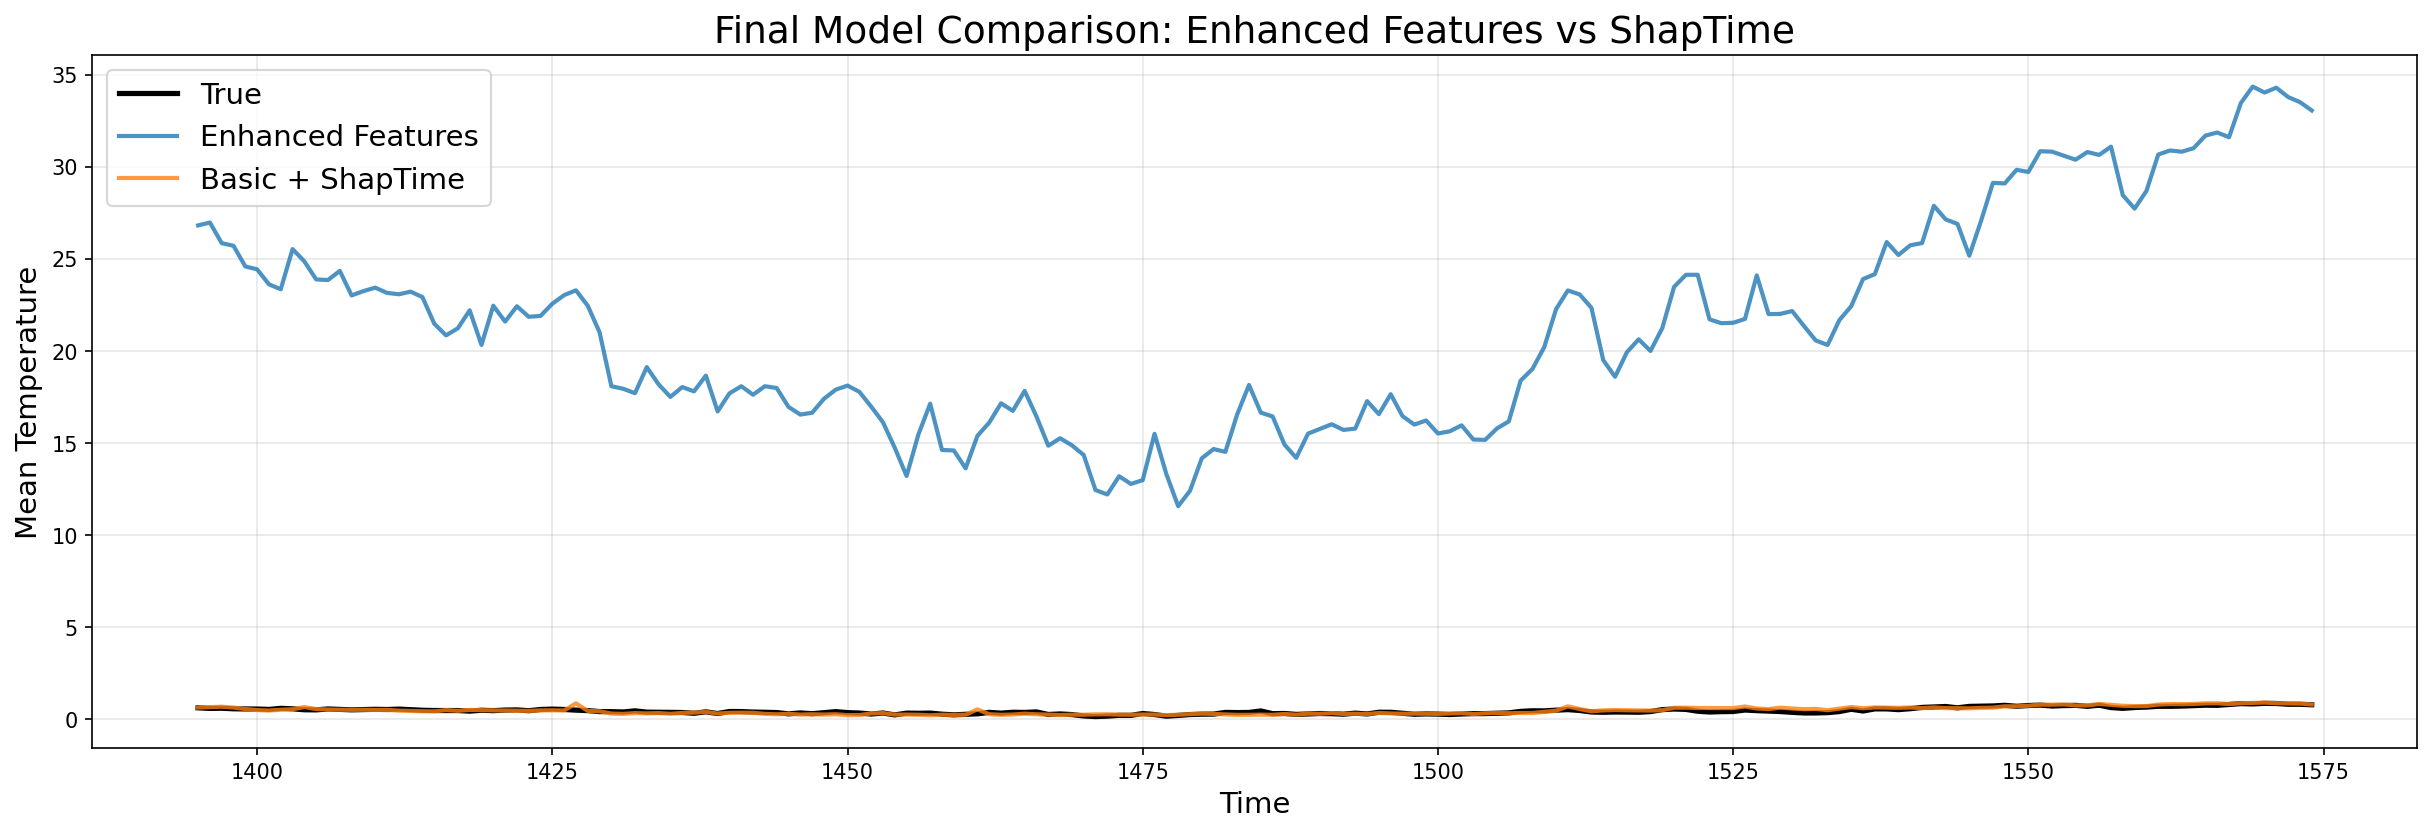

FINAL MODEL PERFORMANCE SUMMARY
Basic Features:           R² = 0.7814,      MSE = 0.008271
Enhanced Features:        R² = 0.9283,   MSE = 2.295934
Basic + ShapTime:         R² = 0.7848, MSE = 0.008233


In [ ]:
# Ultimate comparison plot replacing "Original" with "Enhanced Original"
sns.reset_orig()
plt.figure(figsize=(20, 6), dpi=150)

plt.plot(y_test["meantemp"], label="True", linewidth=2.5, color="black")
plt.plot(
    prediction_enh, label="Enhanced Features", linewidth=2, alpha=0.8
)  # This replaces "Original"
plt.plot(pred_our, label="Basic + ShapTime", linewidth=2, alpha=0.8)

plt.title("Final Model Comparison: Enhanced Features vs ShapTime", fontsize=18)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Mean Temperature", fontsize=14)
plt.legend(fontsize=14, loc="best")
plt.grid(True, alpha=0.3)
plt.show()

# Performance summary
print("=" * 60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 60)
print(f"Basic Features:           R² = {r2:.4f},      MSE = {mse:.6f}")
print(f"Enhanced Features:        R² = {r2_enh:.4f},   MSE = {mse_enh:.6f}")
print(f"Basic + ShapTime:         R² = {r2_check:.4f}, MSE = {mse_check:.6f}")
print("=" * 60)